In [1]:
import torch as tc

In [2]:
import urllib.request

In [3]:
url="https://pixnio.com/free-images/2018/11/27/2018-11-27-15-44-25-850x478.jpg"

In [4]:
file_name="car.jpg"

In [5]:
urllib.request.urlretrieve(url, file_name)

('car.jpg', <http.client.HTTPMessage at 0x241cf3802c8>)

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

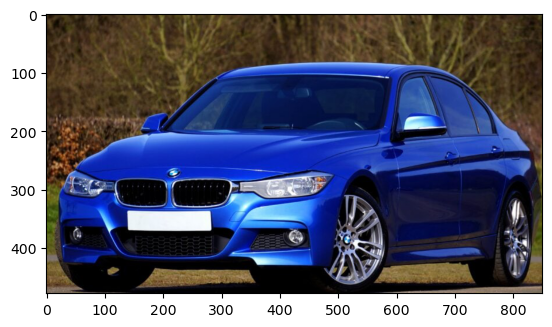

In [7]:
img = Image.open("car.jpg")
plt.imshow(img)

In [8]:
from torchvision import transforms

C:\Users\ciyab\anaconda3\envs\tf_env\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [9]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229,0.224, 0.225]
    )
])

In [10]:
img_tensor = preprocess(img)
img_tensor.shape

torch.Size([3, 224, 224])

In [11]:
batch = img_tensor.unsqueeze(0)

In [12]:
batch.shape

torch.Size([1, 3, 224, 224])

In [13]:
from torchvision import models

In [14]:
model = models.googlenet(pretrained = True)

C:\Users\ciyab\anaconda3\envs\tf_env\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
C:\Users\ciyab\anaconda3\envs\tf_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\ciyab/.cache\torch\hub\checkpoints\googlenet-1378be20.pth
100.0%


In [15]:
device = "cuda" if tc.cuda.is_available() else "cpu"

In [16]:
model.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [17]:
model.to(device)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [18]:
y=model(batch.to(device))

In [19]:
y.shape

torch.Size([1, 1000])

In [20]:
y_max, index= tc.max(y,1)
print(index, y_max)

tensor([817]) tensor([8.3211], grad_fn=<MaxBackward0>)


In [21]:
url= "http://pytorch.tips/imagenet-labels"

In [22]:
fname="imagenet_class_label.txt"

In [23]:
urllib.request.urlretrieve(url,fname)

('imagenet_class_label.txt', <http.client.HTTPMessage at 0x241d63aa988>)

In [24]:
with open("imagenet_class_label.txt") as f:
    classes = [line.strip() for line in f.readlines()]

In [25]:
print(classes[817])

817: 'sports car, sport car',


In [26]:
prob= tc.nn.functional.softmax(y,dim=1)[0]*100

In [27]:
print(classes[index[0]],
     prob[index[0]].item())

817: 'sports car, sport car', 42.187164306640625


In [28]:
_, indeces = tc.sort(y, descending = True)

In [29]:
for idx in indeces[0][:5]:
    print(classes[idx],prob[idx].item())

817: 'sports car, sport car', 42.187164306640625
717: 'pickup, pickup truck', 11.052682876586914
479: 'car wheel', 9.843002319335938
511: 'convertible', 7.04118537902832
581: 'grille, radiator grille', 6.683979034423828
